# COURSE 3 / PROJECT 

# BENCHMARK MODEL / REGRESSION

## Importing the necessary libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
import datetime

## Importing the Dataset

In [2]:
data=pd.read_csv("nyc_taxi_trip_duration Dataset.csv")

## Exploring the dataset

In [3]:
# Finding the shape of the data
data.shape

(729322, 11)

### There are 729322 rows and 11 columns in the dataset.

In [4]:
# Viewing the first 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# Finding the datatypes
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### There are no missing values and hence no imputing is needed.

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Feature Creation

In [7]:
# Converting datetime variables which are in object form to datetime datatype
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [8]:
# Creating features based on month

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [9]:
# Creating features based on the day of week

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [10]:
# Creating features based on hour of the day

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour


In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,2,0,0,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,3,4,4,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,2,6,6,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,1,1,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,2,2,6,6


## Shuffling and creating train and test dataset

In [12]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

# Creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [13]:
# Viewing the train set
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,5,5,5,5,10,10
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,1,1,4,4,18,18
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,5,5,6,6,0,1
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,6,6,5,5,10,10
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,4,4,6,6,10,10


In [14]:
# Viewing the test set
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346,5,5,2,2,7,8
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240,1,1,0,0,12,12
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671,3,3,2,2,18,18
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43,4,4,2,2,19,19
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325,6,6,1,1,18,18


## Simple mean ( trip_duration)

In [15]:
# Storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [16]:
# Calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

621.9954570969938

### This is the Mean Absolute Error with respect to the target variable only. Now let's calculate with respect to other independant variables with the help of a pivot table.

## 1. Mean Absolute Error with respect to vendor_id

In [17]:
# Creating a pivot table using vendor_id as the index
ven_id = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
ven_id

,trip_duration
vendor_id,
1,838.174354
2,1049.946134


In [18]:
# Initializing new column to zero
test['ven_id_mean'] = 0

# For every unique entry in vendor_id

for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['ven_id_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

In [19]:
# Calculating Mean Absolute Error
vendor_id_error = MAE(test['trip_duration'],test['ven_id_mean'])
vendor_id_error

954.9334105467856

## 2. Mean Absolute Error with respect to pick_up hour

In [20]:
# Creating a pivot table with pickup_hour as the index
pickup_hr = pd.pivot_table(train, values='trip_duration', index = ['pickup_hour'], aggfunc=np.mean)
pickup_hr


,trip_duration
pickup_hour,
0,982.268516
1,915.598624
2,853.385638
3,886.535977
4,890.512498
5,829.845634
6,726.336661
7,812.179002
8,937.732130


In [21]:
# Initializing new column to zero
test['pickup_hour_mean'] = 0

# For every unique entry in pickup_hour

for i in train['pickup_hour'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_hour_mean'][test['pickup_hour'] == str(i)] = train['trip_duration'][train['pickup_hour'] == str(i)].mean()

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
# Calculating Mean Absolute Error
pickup_hour_error = MAE(test['trip_duration'],test['pickup_hour_mean'])
pickup_hour_error

954.9334105467856

In [24]:
# Calculating Mean Squared Error
pickup_hour_error = mean_squared_error(test['trip_duration'],test['pickup_hour_mean'],squared=True)
pickup_hour_error

11186892.242750514

In [25]:
# Calculating Root Mean Squared Error
pickup_hour_error = mean_squared_error(test['trip_duration'],test['pickup_hour_mean'],squared=False)
pickup_hour_error

3344.6811870117776

### Here we can see that the error is minimum for the MAE metric. For MSE and RMSE, the error is more.

# Implementing Knn Regression 

## 1. First we have to impute missing values. Let's check that once again.

In [26]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_month          0
dropoff_month         0
pickup_day_no         0
dropoff_day_no        0
pickup_hour           0
dropoff_hour          0
dtype: int64

### As there are no missing values, lets's move on to the next step .

## 2. The next step is to encode all categorical variables and drop any variable which would not contribute to the model.

In [27]:
data = data.drop(columns=['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [28]:
# One-hot encoding
data = pd.get_dummies(data)

In [29]:
data.dtypes

vendor_id               int64
passenger_count         int64
trip_duration           int64
pickup_month            int64
dropoff_month           int64
pickup_day_no           int64
dropoff_day_no          int64
pickup_hour             int64
dropoff_hour            int64
store_and_fwd_flag_N    uint8
store_and_fwd_flag_Y    uint8
dtype: object

In [30]:
data.head()

,vendor_id,passenger_count,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
469114,2,1,657,5,5,5,5,10,10,1,0
694852,2,5,195,1,1,4,4,18,18,1,0
696324,1,1,840,5,5,6,6,0,1,1,0
356496,1,1,398,6,6,5,5,10,10,1,0
645318,1,3,682,4,4,6,6,10,10,1,0


### The store_and_fwd_flag have been converted from object type into numerical by encoding.

## 3. Segregating the Independant and dependant variables

In [31]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

In [32]:
# Viewing the first five rows
x.head()

,vendor_id,passenger_count,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
469114,2,1,5,5,5,5,10,10,1,0
694852,2,5,1,1,4,4,18,18,1,0
696324,1,1,5,5,6,6,0,1,1,0
356496,1,1,6,6,5,5,10,10,1,0
645318,1,3,4,4,6,6,10,10,1,0


In [33]:
# Checking the column names
x.columns

Index(['vendor_id', 'passenger_count', 'pickup_month', 'dropoff_month',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'],
      dtype='object')

In [34]:
# Viewing the structure of the target variable
y.head()

469114    657
694852    195
696324    840
356496    398
645318    682
Name: trip_duration, dtype: int64

## 4. Scaling the data (Using MinMax Scaler)

In [35]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
# Converting back into a dataframe
x = pd.DataFrame(x_scaled)

In [37]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.111111,0.8,0.666667,0.833333,0.833333,0.434783,0.434783,1.0,0.0
1,1.0,0.555556,0.0,0.000000,0.666667,0.666667,0.782609,0.782609,1.0,0.0
2,0.0,0.111111,0.8,0.666667,1.000000,1.000000,0.000000,0.043478,1.0,0.0
3,0.0,0.111111,1.0,0.833333,0.833333,0.833333,0.434783,0.434783,1.0,0.0
4,0.0,0.333333,0.6,0.500000,1.000000,1.000000,0.434783,0.434783,1.0,0.0


In [38]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state=40)

## 5. Implementing Knn Regressor

In [39]:
# Importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

# Importing MSE metric for evaluation
from sklearn.metrics import mean_squared_error as mse


In [40]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     3893776.8581669605


In [41]:
# Defining a function to train the data for different values of k
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [42]:
#Defining K range
k = range(1,40)

In [43]:
# Calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

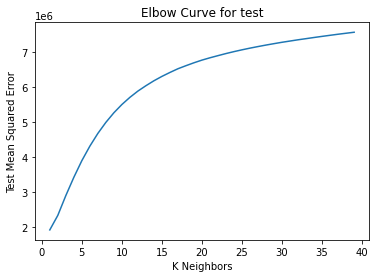

In [44]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

  ### Here, as the k value increases, the Mean Squared Error also increases.

## Implementing Linear Regression

In [45]:
# Importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [46]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [47]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 627.6111780175543


In [48]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     624.836446661566


### The train dataset and test dataset seems to have almost same error. This ensures the model to perform well on any dataset.

## Parameters of Linear Regression

In [49]:
lr.coef_

array([ 2.01083573e+02,  1.48793403e+02, -7.28126485e+04,  8.74976085e+04,
        1.39530183e+03, -1.42326995e+03, -3.52079941e+02,  3.80148565e+02,
        1.84474150e+14,  1.84474150e+14])

## Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

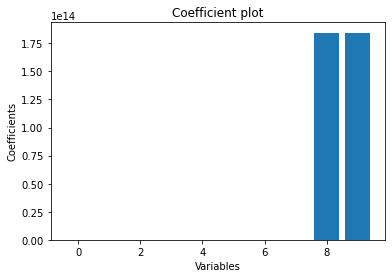

In [50]:

x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [51]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
177185,2192,848.40625,1343.59375
270050,482,1019.40625,-537.40625
722334,232,806.12500,-574.12500
199304,933,982.81250,-49.81250
667484,988,1090.06250,-102.06250


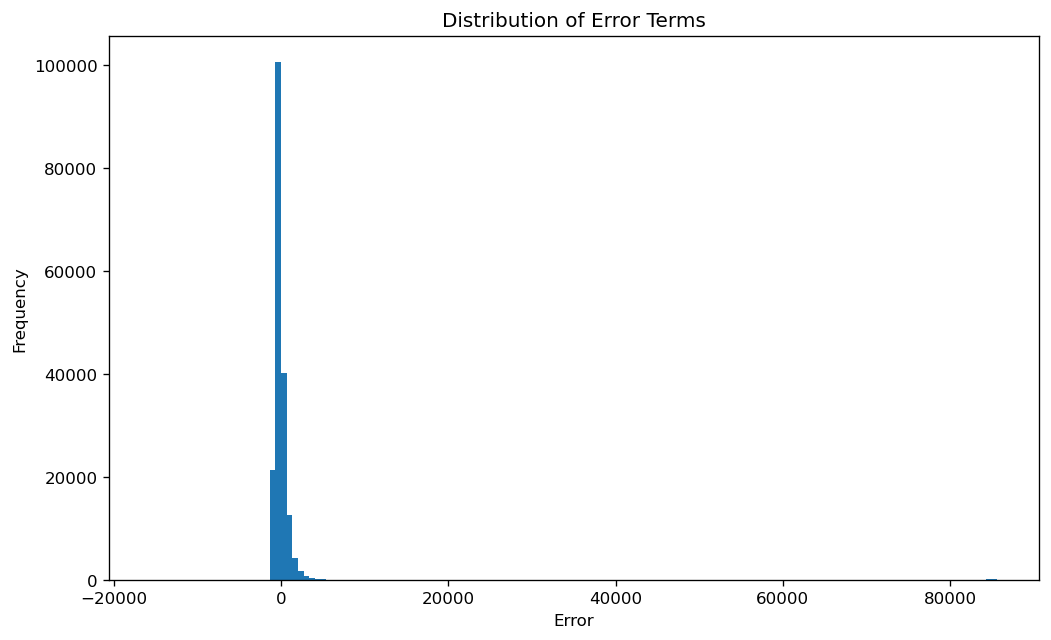

In [52]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

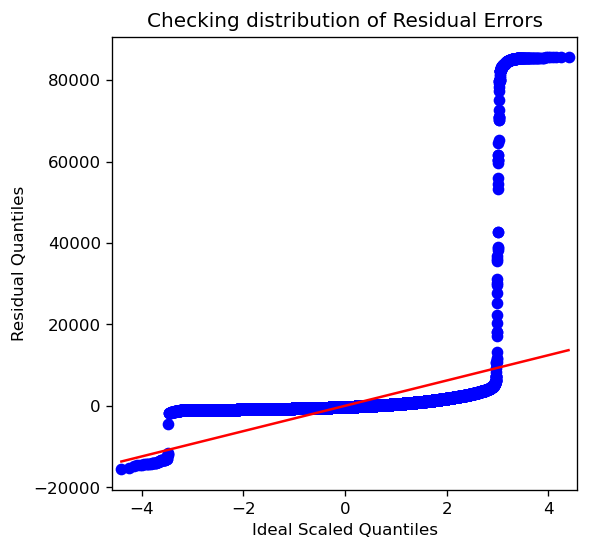

In [53]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

## The QQ plot reveals that there are outliers on the lower  and higher values.

In [54]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

vendor_id                  1.096810
passenger_count            1.090325
trip_duration              1.005757
pickup_month            8226.826992
dropoff_month           8227.032231
pickup_day_no             83.551497
dropoff_day_no            83.628483
pickup_hour                8.358616
dropoff_hour               8.377847
store_and_fwd_flag_N      22.710014
store_and_fwd_flag_Y       1.091097
dtype: float64

In [55]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [56]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 627.6096699945703


In [57]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     624.8347089222349


Text(0.5, 1.0, 'Normalized Coefficient plot')

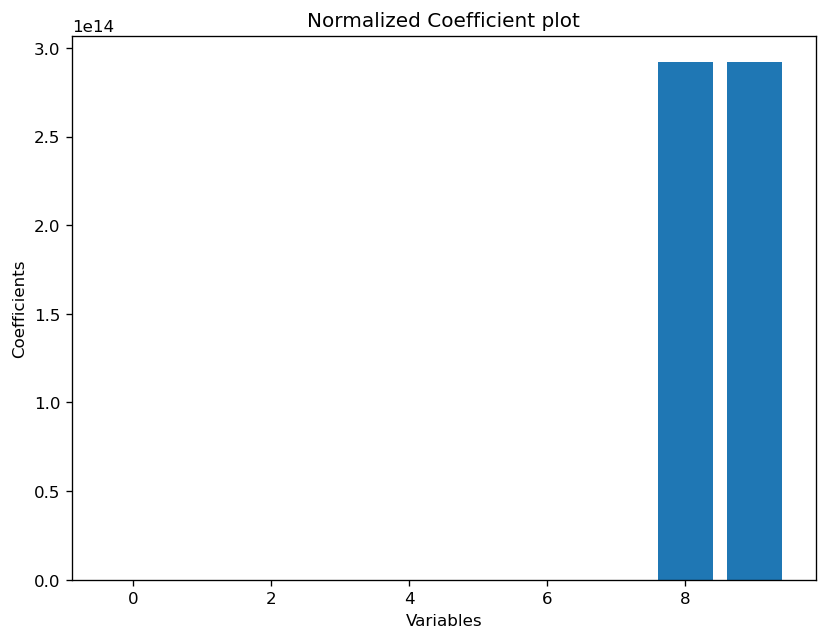

In [58]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

# Implementing Decision Tree

In [59]:
#Checking the dataset
data.head()

,vendor_id,passenger_count,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
469114,2,1,657,5,5,5,5,10,10,1,0
694852,2,5,195,1,1,4,4,18,18,1,0
696324,1,1,840,5,5,6,6,0,1,1,0
356496,1,1,398,6,6,5,5,10,10,1,0
645318,1,3,682,4,4,6,6,10,10,1,0


In [60]:
# Checking for any missing values in the dataset.
data.isnull().sum()

vendor_id               0
passenger_count         0
trip_duration           0
pickup_month            0
dropoff_month           0
pickup_day_no           0
dropoff_day_no          0
pickup_hour             0
dropoff_hour            0
store_and_fwd_flag_N    0
store_and_fwd_flag_Y    0
dtype: int64

In [61]:
# Seperating independent and dependent variables
y = data['trip_duration']
X = data.drop(['trip_duration'], axis=1)

In [62]:
#importing train_test_split to create validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101)

In [63]:
# Shape of train set
X_train.shape, y_train.shape

((546991, 10), (546991,))

In [64]:
# Shape of validation set
X_valid.shape, y_valid.shape

((182331, 10), (182331,))

In [65]:
# Importing  decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
# Creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [67]:
# Fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [68]:
# Checking the training score
dt_model.score(X_train, y_train)

0.9816232175688602

In [ ]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.920481533127353

In [ ]:
#predictions on validation set
y_predict = dt_model.predict(X_valid)

In [ ]:
p = mae(y_valid,y_predict)

In [ ]:
print(" Valid Mean Absolute Error",p)

 Valid Mean Absolute Error 432.1829813095992


In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.000679,0.001232
1,2,0.001185,0.004462
2,3,0.416823,0.013406
3,4,0.417692,0.014193
4,5,0.440796,0.045340


Text(0, 0.5, 'performance')

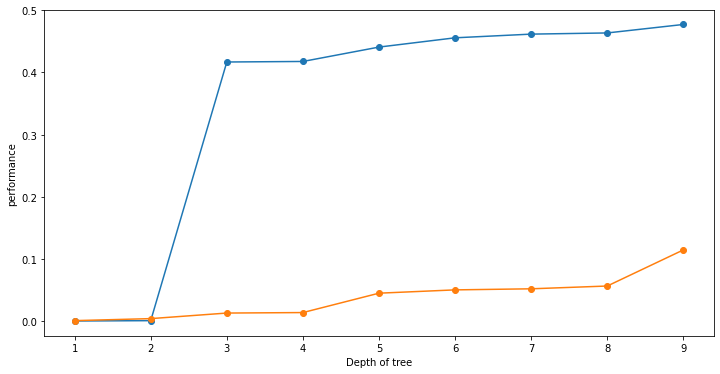

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')


### From the plot, it is observed that as the depth of the tree increases, the performance of the model is on the train and the validation sets seems to be the same.